In [109]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen 

In [213]:
httpobject =urlopen('https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo,b5g')
webdata =httpobject.read()
# print(webdata)

In [214]:
soup1 = soup(webdata)

In [234]:
pages_link =soup1.findAll('a', {'class':'ge-49M'})
domain ='https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page='
for i in range(2,16):
    link =domain + str(i) 
    page_data =urlopen(link)
    webpage1 =page_data.read()
    webdata +=webpage1

In [235]:
soupdata = soup(webdata, 'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [236]:
containers =soupdata.findAll('div', {'class':'_2kHMtA'})
print(type(containers), len(containers))



<class 'bs4.element.ResultSet'> 737


In [237]:
containers[0]

<div class="_2kHMtA"><a class="_1fQZEK" href="/hp-14s-intel-core-i3-11th-gen-8-gb-256-gb-ssd-windows-11-home-dy2507tu-thin-light-laptop/p/itm183e95bd1f23b?pid=COMGG63H9BFFUYVY&amp;lid=LSTCOMGG63H9BFFUYVYFHH552&amp;marketplace=FLIPKART&amp;store=6bo%2Fb5g&amp;srno=b_1_1&amp;otracker=browse&amp;fm=organic&amp;iid=43039c68-c71e-4074-80e0-fd1edd8f650e.COMGG63H9BFFUYVY.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=qbw9ci29c00000001675617927493" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input class="_30VH

In [238]:
f =open('laptops_info.csv', 'wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n'.encode())
for container in containers:
   
   # findind the product name
    product =container.find('div', {'class':'_4rR01T'})
    ProductName =product.text.split('-')[0].strip() # strip() is used to remove extra spaces from lift and right side of the string.\
    
    # Finding Stars
    star =container.find('div', {'class':'_3LWZlK'})
    
    try:
        Stars =star.text
    except:
       Stars = 0
    
    # Finding Ratings and Reviews   
    Rating =container.find('span', {'class':'_2_R_DZ'})
    
    try:
       import re
       ratRev  =re.findall('\d+,?\d*', Rating.text)
       Ratings =ratRev[0].replace(',','')
       Reviews =ratRev[1].replace(',','')
    except:
       Ratings =0
       Reviews =0
     
     # Finding current Price
     
    CurrentPrice =container.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace(',','').replace('₹','')
     
    # Finding Original Price MRP
    mrp =container.find('div', {'class':"_3I9_wc _27UcVY"})
    try:
        MRP =mrp.text.replace(',', '').replace('₹','')
    except:
        MRP =0

    # Finding Information about product
    
    info =container.findAll('li',{'class':'rgWa7D'})
    Processor =info[0].text
    RAM =info[1].text
    Storage =info[3].text

    Image =container.img # It only contain only one image Tag
    ImageURL =(Image.get('src')) # get() is used to get the value of the attribute (particular Key)
    
    print(ProductName, Stars, Ratings, Reviews, CurrentPrice, MRP, Processor, RAM, Storage, ImageURL)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
    print('\n')
f.close()

HP 14s Intel Core i3 11th Gen 4.2 1585 139 35490 47206 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q=70


ASUS VivoBook 15 (2022) Core i3 10th Gen 4.3 10068 1007 33990 45990 Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/e/1/7/-original-imag3ebnzawky4kn.jpeg?q=70


Lenovo V15 G2 Core i3 11th Gen 4 28 2 33999 59760 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/d/t/c/v15-g2-alc-laptop-lenovo-original-imaghq2ffspmtfuh.jpeg?q=70


DELL Vostro Core i3 11th Gen 4.1 39 1 37990 58489 Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD Display: 15.6" FHD WVA AG Narrow Border https://rukminim1.flixcart.com/image/312/312/xif0q/compute

AttributeError: 'NoneType' object has no attribute 'text'

In [241]:
df =pd.read_csv('laptops_info.csv', error_bad_lines=False)
df

c:\Users\asifb\Downloads\conda2022\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 45: expected 10 fields, saw 17\nSkipping line 54: expected 10 fields, saw 14\nSkipping line 91: expected 10 fields, saw 14\nSkipping line 108: expected 10 fields, saw 14\nSkipping line 367: expected 10 fields, saw 11\nSkipping line 413: expected 10 fields, saw 17\nSkipping line 430: expected 10 fields, saw 14\nSkipping line 486: expected 10 fields, saw 14\n'


,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,HP 14s Intel Core i3 11th Gen,4.2,1585,139,35490,47206,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
1,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,10068,1007,33990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
2,Lenovo V15 G2 Core i3 11th Gen,4.0,28,2,33999,59760,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,DELL Vostro Core i3 11th Gen,4.1,39,1,37990,58489,Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,"Display: 15.6"" FHD WVA AG Narrow Border",https://rukminim1.flixcart.com/image/312/312/x...
4,ASUS TUF Gaming F15 Core i5 10th Gen,4.4,4527,439,49990,70990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
...,...,...,...,...,...,...,...,...,...,...
705,DELL Athlon Dual Core 3050U,4.2,155,20,38499,41500,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
706,DELL Inspiron Core i3 11th Gen,0.0,0,0,44200,56000,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
707,HP Ryzen 3 Dual Core 3250U,3.7,35,3,29997,43628,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
708,HP Ryzen 3 Dual Core,3.4,19,2,28490,43628,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


# Find Highest Ratings

In [243]:
df[df['Ratings'] ==max(df['Ratings'])]


,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
210,realme Book (Slim) Core i3 11th Gen,4.4,12414,1851,46990,54999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
590,realme Book (Slim) Core i3 11th Gen,4.4,12414,1851,46990,54999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


In [244]:
df.sort_values(by='Ratings', ascending=False).head()

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
210,realme Book (Slim) Core i3 11th Gen,4.4,12414,1851,46990,54999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
590,realme Book (Slim) Core i3 11th Gen,4.4,12414,1851,46990,54999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
1,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,10068,1007,33990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
412,ASUS VivoBook 15 (2022) Core i5 10th Gen,4.3,6083,520,46990,62990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
377,HP Chromebook MediaTek Kompanio 500,3.8,5957,684,22490,25451,MediaTek MediaTek Kompanio 500 Processor,4 GB DDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...


In [186]:
import matplotlib.pyplot as plt



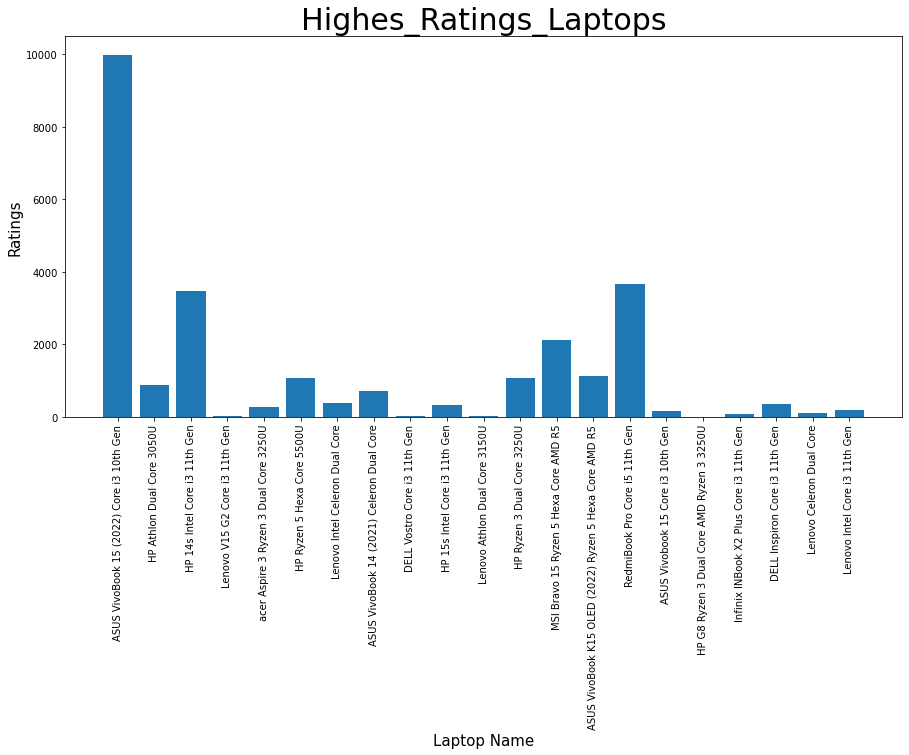

In [192]:
plt.figure(figsize=(15,7))
plt.bar(x =df['ProductName'], height=df['Ratings'] )
plt.title('Highes_Ratings_Laptops', fontsize =30)
plt.xlabel('Laptop Name', fontsize= 15)
plt.ylabel('Ratings', fontsize =15)
plt.xticks(rotation =90)
plt.savefig('MyFirst_project')
plt.show()


# Most Affordable Laptops

In [197]:
df.sort_values(by='CurrentPrice', ascending=True).head()

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
10,Lenovo Athlon Dual Core 3150U,3.8,13,2,18990,29999,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/x...
7,ASUS VivoBook 14 (2021) Celeron Dual Core,4.1,707,87,23990,33990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
4,acer Aspire 3 Ryzen 3 Dual Core 3250U,4.2,273,55,26990,42999,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
6,Lenovo Intel Celeron Dual Core,4.1,373,35,27000,40490,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
18,HP G8 Ryzen 3 Dual Core AMD Ryzen 3 3250U,0.0,0,0,28490,40528,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


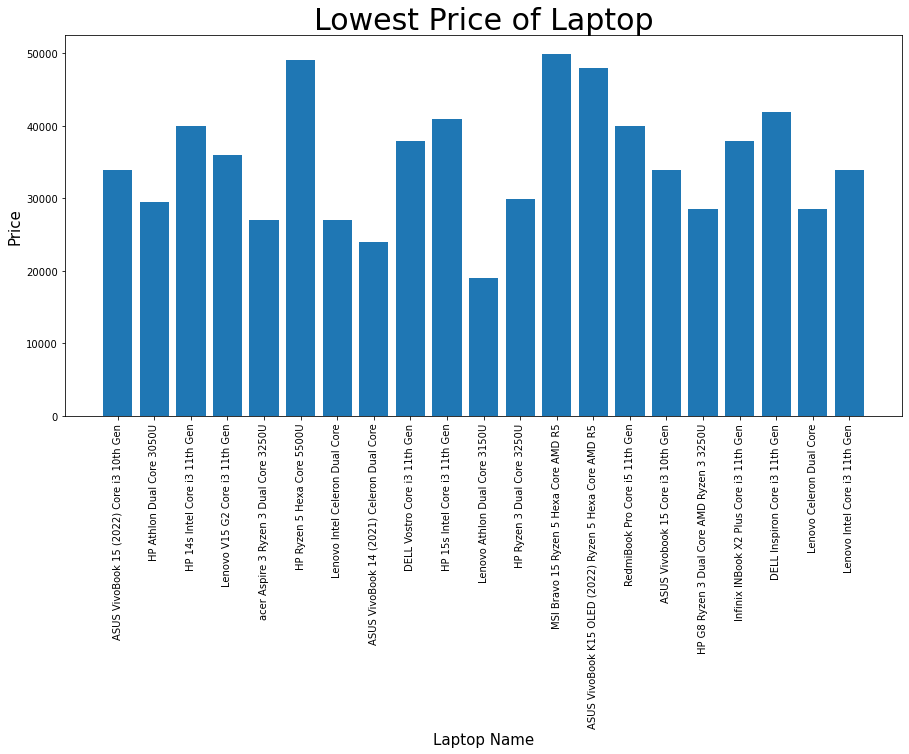

In [198]:
plt.figure(figsize=(15,7))
plt.bar(x =df['ProductName'], height=df['CurrentPrice'] )
plt.title('Lowest Price of Laptop', fontsize =30)
plt.xlabel('Laptop Name', fontsize= 15)
plt.ylabel('Price', fontsize =15)
plt.xticks(rotation =90)
plt.savefig('MyFirst_project')
plt.show()

In [200]:
smalldf =df[['ProductName', 'CurrentPrice', 'MRP']]


,ProductName,CurrentPrice,MRP
0,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,45990
1,HP Athlon Dual Core 3050U,29490,39288
2,HP 14s Intel Core i3 11th Gen,35490,47206
3,Lenovo V15 G2 Core i3 11th Gen,33999,59760
4,acer Aspire 3 Ryzen 3 Dual Core 3250U,26990,42999
5,HP Ryzen 5 Hexa Core 5500U,49123,59108
6,Lenovo Intel Celeron Dual Core,27000,40490
7,ASUS VivoBook 14 (2021) Celeron Dual Core,23990,33990
8,DELL Vostro Core i3 11th Gen,37990,58489
9,HP 15s Intel Core i3 11th Gen,40950,50585


In [201]:
soupdata.find('nav',{'class':'yFHi8N'})

<nav class="yFHi8N"><a class="ge-49M _2Kfbh8" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=1">1</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=2">2</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=3">3</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=4">4</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=5">5</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=6">6</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=7">7</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=8">8</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=9">9</a><a class="ge-49M" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&amp;page=10">10</a><a class="_1LKTO3" href="/laptops/~laptops-under-rs50000/pr?sid=6bo%2C

In [208]:
pages_link =soupdata.findAll('a', {'class':'ge-49M'})

domain ='https://www.flipkart.com'
for i in pages_link:
    print(domain + i.get('href'))
# domain + pages_link[1].get('href')

https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=1
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=2
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=3
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=4
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=5
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=6
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=7
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=8
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=9
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=10


In [212]:
domain1 ='https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page='
for i in range(1,36):
    print(domain1 + str(i))



https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=1
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=2
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=3
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=4
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=5
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=6
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=7
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=8
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=9
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=10
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=11
https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=12
https://www.flipkart.com/laptops/~lap